https://towardsdatascience.com/how-to-reshape-data-and-do-regression-for-time-series-using-lstm-133dad96cd00

In [ ]:
!pip install tqdm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
import os
from tqdm import tqdm as tqdm
from sklearn import metrics
from keras.regularizers import L1L2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/COVID19/owid-covid-data.csv').to_numpy()

In [ ]:
print(dataset[dataset[:,2] == 'Iran'][:,3])

['2019-12-31' '2020-01-01' '2020-01-02' '2020-01-03' '2020-01-04'
 '2020-01-05' '2020-01-06' '2020-01-07' '2020-01-08' '2020-01-09'
 '2020-01-10' '2020-01-11' '2020-01-12' '2020-01-13' '2020-01-14'
 '2020-01-15' '2020-01-16' '2020-01-17' '2020-01-18' '2020-01-19'
 '2020-01-20' '2020-01-21' '2020-01-22' '2020-01-23' '2020-01-24'
 '2020-01-25' '2020-01-26' '2020-01-27' '2020-01-28' '2020-01-29'
 '2020-01-30' '2020-01-31' '2020-02-01' '2020-02-02' '2020-02-03'
 '2020-02-04' '2020-02-05' '2020-02-06' '2020-02-07' '2020-02-08'
 '2020-02-09' '2020-02-10' '2020-02-11' '2020-02-12' '2020-02-13'
 '2020-02-14' '2020-02-15' '2020-02-16' '2020-02-17' '2020-02-18'
 '2020-02-19' '2020-02-20' '2020-02-21' '2020-02-22' '2020-02-23'
 '2020-02-24' '2020-02-25' '2020-02-26' '2020-02-27' '2020-02-28'
 '2020-02-29' '2020-03-01' '2020-03-02' '2020-03-03' '2020-03-04'
 '2020-03-05' '2020-03-06' '2020-03-07' '2020-03-08' '2020-03-09'
 '2020-03-10' '2020-03-11' '2020-03-12' '2020-03-13' '2020-03-14'
 '2020-03-

In [ ]:
Iran_data_orig = dataset[dataset[:,2] == 'Iran'][:,5]
Iran_data =  Iran_data_orig[Iran_data_orig != 0][:-1]
Iran_data_1 = Iran_data[np.where(np.logical_and(Iran_data>(np.mean(Iran_data) - 2.5 * np.std(Iran_data)), Iran_data<(np.mean(Iran_data) + 2.5 * np.std(Iran_data))))]
Iran_data_final = (Iran_data_1 - np.mean(Iran_data_1, axis = 0)) / np.std(Iran_data_1, axis = 0, dtype='float')
# print(Iran_data_1)
print(Iran_data_final.shape)

(195,)


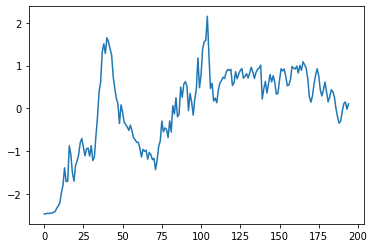

In [ ]:
plt.plot(Iran_data_final)

In [ ]:
data = np.empty((199,1))
DATA_DIR = '/content/drive/My Drive/COVID19/Search Data'
sessionFolders, sessions = list(sorted(os.listdir(DATA_DIR))), []
for sessionFolder in tqdm(sessionFolders):
    file = os.path.join(DATA_DIR, sessionFolder)
    data_init = pd.read_csv(file).to_numpy()
    data = np.concatenate((data, data_init[1:,]), axis = 1)
data_2 = data[:, 1:]
data = np.array([[int(j) for j in i]  for i in data_2])
print(data.shape)

100%|██████████| 9/9 [00:00<00:00, 72.66it/s]

(199, 9)


In [ ]:
# dataset1 = pd.read_csv('/content/drive/My Drive/COVID19/Dataset1.csv').to_numpy()
# dataset2 = pd.read_csv('/content/drive/My Drive/COVID19/Dataset2.csv').to_numpy()
# data = np.concatenate((dataset1[1:, 1:], dataset2[1:, 1:]), axis = 1)
# print(np.std(data, axis = 0, dtype='float'))

In [ ]:
search_result_1 = data[np.where(np.logical_and(Iran_data>(np.mean(Iran_data) - 2.5 * np.std(Iran_data)), Iran_data<(np.mean(Iran_data) + 2.5 * np.std(Iran_data)))), :][0]
final_search_result = (search_result_1 - np.mean(search_result_1, axis = 0)) / np.std(search_result_1, axis = 0, dtype='float')

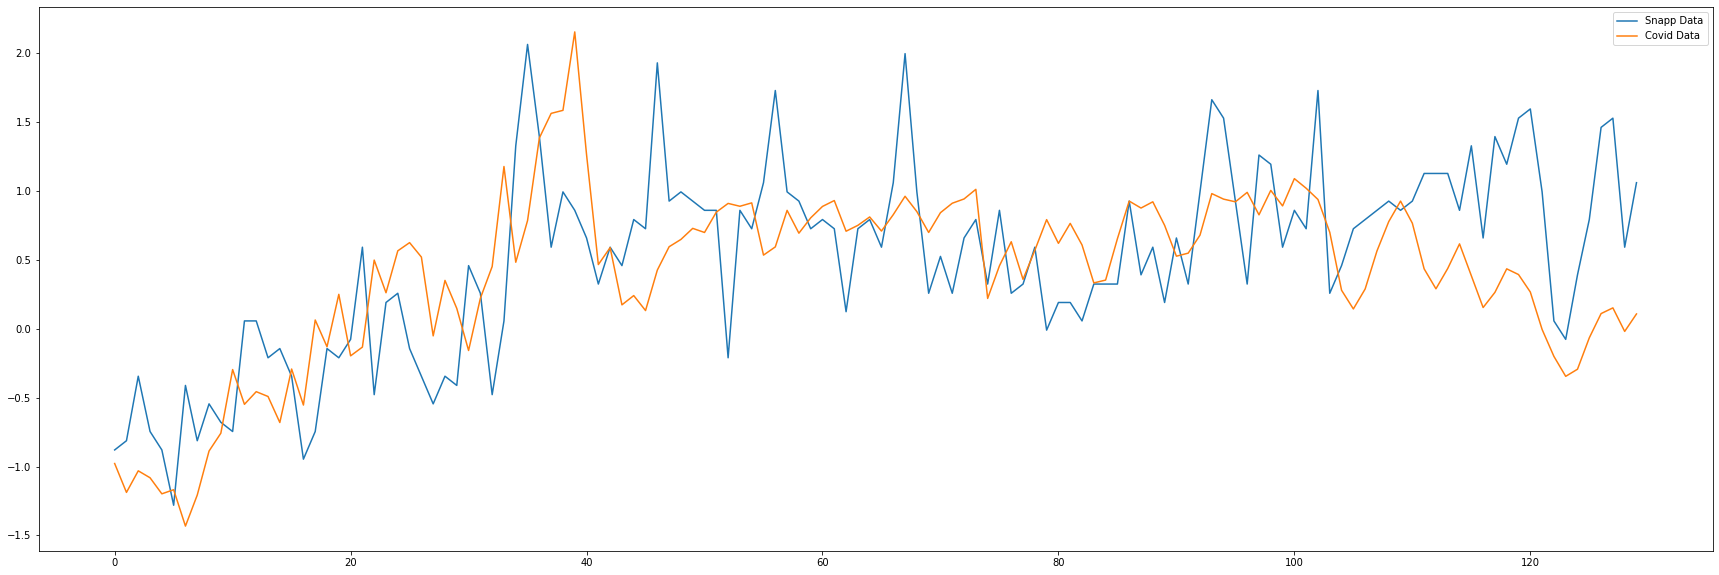

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(final_search_result[65:, 8].astype(float))
plt.plot(Iran_data_final[65:].astype(float))
plt.legend(['Snapp Data', 'Covid Data'])

0 0.6380197668765698


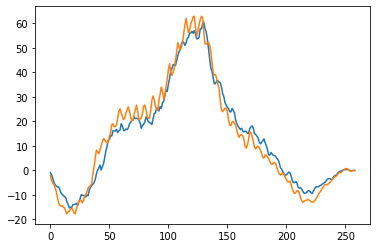

In [ ]:
a = np.empty((19))
value = 8
for i in range(1, 20):
    a[i-1] = np.corrcoef(final_search_result[65-i:-i, value].astype(float), Iran_data_final[65:].astype(float))[0,1]
delay = np.where(a == np.max(a))[0][0]
print(delay, np.max(a))
# print(final_search_result[55-delay:-delay, ].shape)
plt.plot(np.correlate(Iran_data_final[65:], final_search_result[65-delay:, value], mode='full'))
# plt.plot(np.correlate(Iran_data_final[65:], final_search_result[65-delay:, 7], mode='full'))

In [ ]:
a = np.empty((19))
delay_temp = []
for search_result in final_search_result.T[[8]]:
    for i in range(1, 20):
        a[i-1] = np.corrcoef(search_result[65-i:-i].astype(float), Iran_data_final[65:].astype(float))[0,1]
    delay_temp.append(np.where(a == np.max(a))[0][0])
delay = np.array(delay_temp)
print(delay)

# plt.plot(np.correlate(Iran_data_final[55:], final_search_result[55-delay:-delay], mode='full'))

[0]


In [ ]:
# X_temp=[]
# for i in delay:
#     if i == 0:
#         X_temp.append(final_search_result[55:])
#     else:
#         X_temp.append(final_search_result[55-i:-i])
# delay = 2
# X_temp = final_search_result[55 :65][:,8]
# X = np.array(final_search_result[55 :65][:,8])
# y = Iran_data_final[0:40]
x_temp = final_search_result[55:][:,8]
y_temp = Iran_data_final[55:]
# print(X.shape)
x_train = x_temp[0:int(0.8*x_temp.shape[0])].astype(float)
x_test = x_temp[int(0.8*x_temp.shape[0]) :].astype(float)
y_train = y_temp[0:int(0.8*y_temp.shape[0])].astype(float)
y_test = y_temp[int(0.8*y_temp.shape[0]) :].astype(float)
print(y_test.shape)

(28,)


In [ ]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [ ]:
# # scalers
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()
# # scaling
# x_train_sc = scaler_x.fit_transform(x_train)
# x_test_sc = scaler_x.transform(x_test)
# # y_train_sc = scaler_y.fit_transform(y_train)
# # y_test_sc = scaler_y.transform(y_test)
# print(y_test_sc.shape)

In [ ]:
# x_shaped = np.reshape(x, newshape=(-1, num_steps, num_features))
num_features = 1
num_steps = 7

x_shaped = np.reshape(x_temp, newshape=(-1, num_steps, num_features))
y_shaped = np.reshape(y_temp, newshape=(-1, num_steps, num_features))

x_train_shaped = np.reshape(x_train, newshape=(-1, num_steps, num_features))
# print(x_train_sc.shape)
y_train_shaped = np.reshape(y_train, newshape=(-1, num_steps, 1))
print(x_train_shaped.shape)
# assert x_train_shaped.shape[0] == y_train_shaped.shape[0]
# test set
x_test_shaped = np.reshape(x_test, newshape=(-1, num_steps, num_features))
y_test_shaped = np.reshape(y_test, newshape=(-1, num_steps, 1))
print(x_test_shaped.shape)
# assert x_test_shaped.shape[0] == y_test_shaped.shape[0]

(16, 7, 1)
(4, 7, 1)


In [ ]:
# x = np.arange(0, 200, 0.5).reshape(-1, 1)
# y = np.sin(x).reshape(-1, 1)

In [ ]:
model = Sequential()
# bias_regularizer=L1L2(l1=0.01, l2=0.01),
model.add(LSTM(20, activation='tanh', input_shape=(num_steps, num_features), return_sequences=True))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))
adam = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='mse')

In [ ]:
model.fit(np.array(x_train_shaped, dtype='float'), np.array(y_train_shaped, dtype='float'), epochs=200)
test_predict = model.predict(x_test_shaped)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.8441
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 0.8225
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 0.8015
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 0.7812
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 0.7615
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 0.7428
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 0.7254
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 0.7094
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6941
Epoch 10/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6792
Epoch 11/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6649
Epoch 12/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6513
Epoch 13/200
1/1 [==============================] - 0s 8ms/st

In [ ]:
# accuracy = model.score(x_test_shaped,y_test_shaped)
# print(test_predict.flatten().shape)
# print(y_test.shape)
# print('Mean squared error: %.2f'
#       % mean_squared_error(y_test_shaped, test_predict))
# # The coefficient of determination: 1 is perfect prediction
# print('Coefficient of determination: %.2f'
#       % r2_score(y_test_shaped, test_predict))
# # accuracy = metrics.accuracy_score(y_true=y_test.flatten(), y_pred = y_pred.flatten())
#     # return accuracy
print(test_predict.flatten().shape)

(28,)


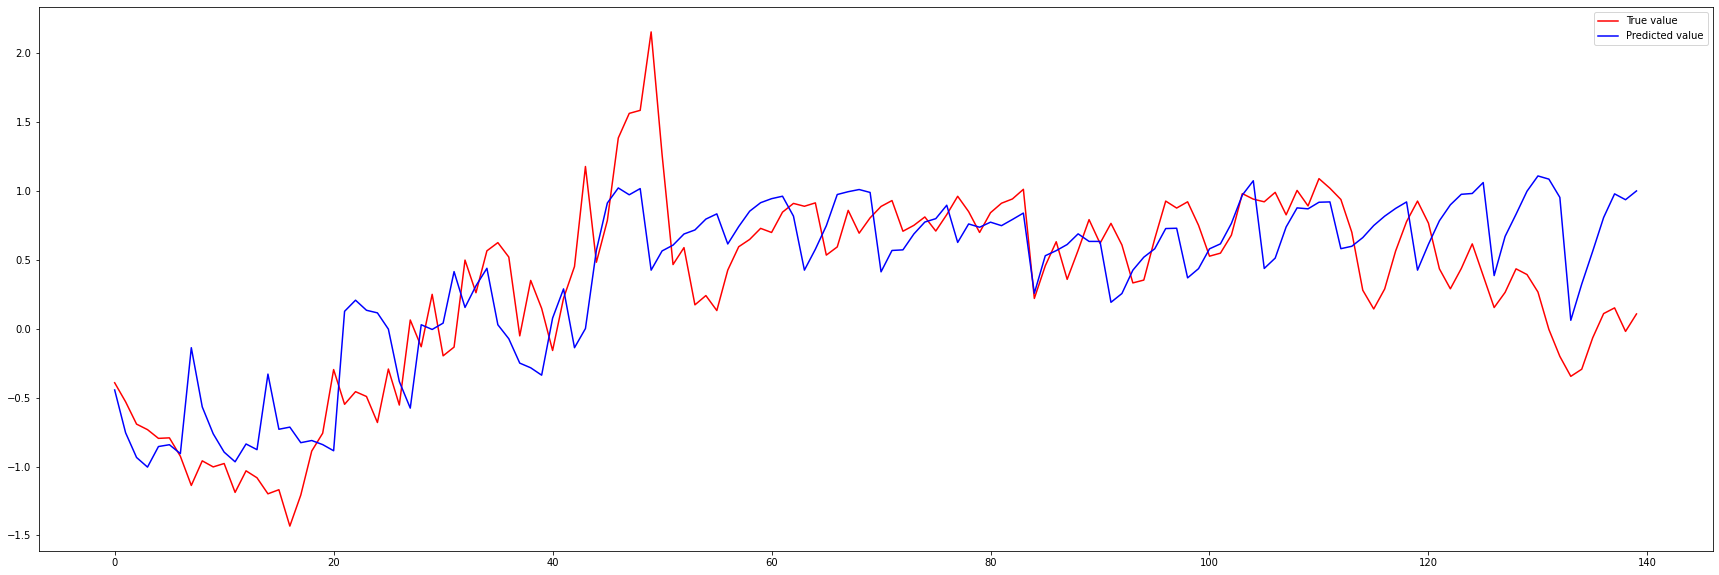

In [ ]:
test_predict = model.predict(x_shaped)
# plt.style.use('ggplot')
plt.figure(figsize=(30, 10))
plt.plot(y_temp, label="True value", color = 'r')
plt.plot(test_predict.flatten().ravel(), label="Predicted value", color = 'b')
# plt.plot(x_temp, label = 'Snapp', color = 'y')
plt.legend()

0.7411963156947649


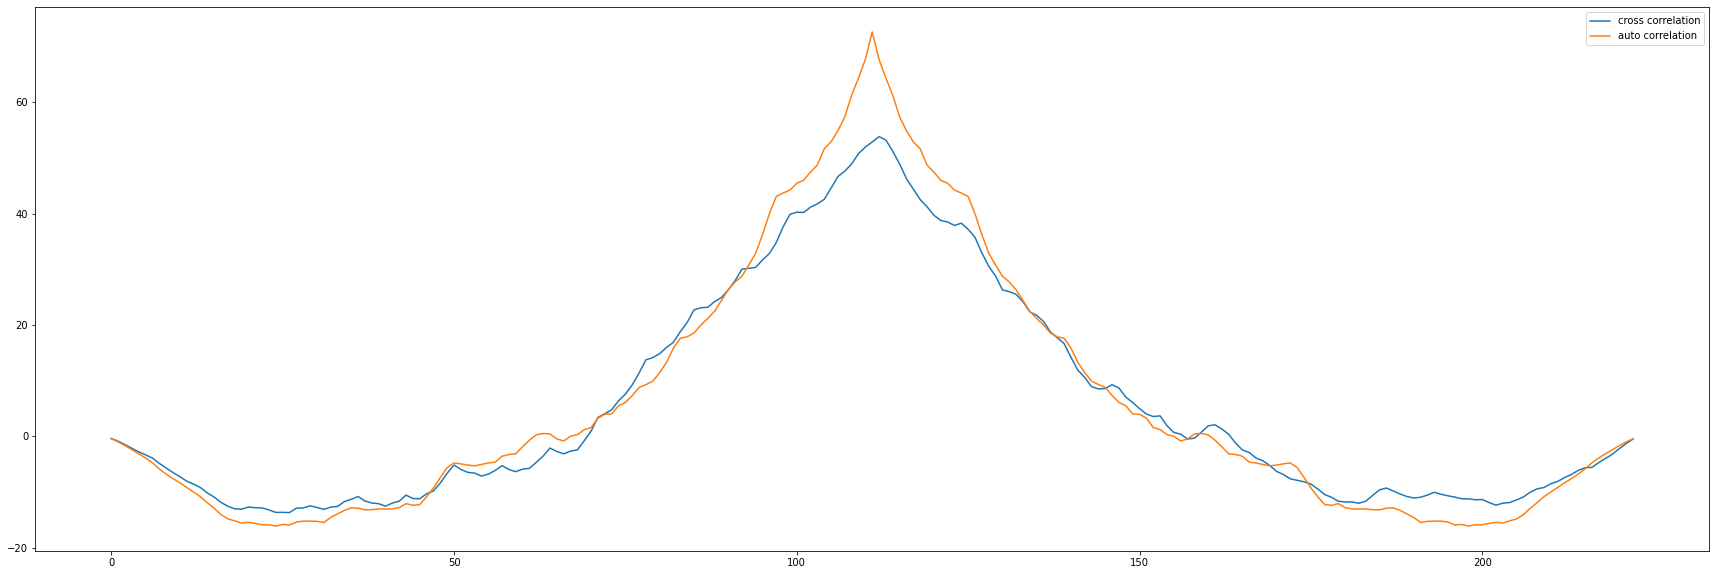

In [ ]:
pred = test_predict.flatten().ravel()
real = y_temp
# plt.plot(pred)
# plt.plot(real)
y_train = real[0 : int(0.8 * real.shape[0])]
y_test = real[int(0.8 * real.shape[0]) :]
pred_train = pred[0 : int(0.8 * pred.shape[0])]
pred_test = pred[int(0.8 * pred.shape[0]) :]
cross_corr = np.correlate(y_train, pred_train, mode = 'full')
auto_corr = np.correlate(y_train, y_train, mode = 'full')
plt.figure(figsize=(30, 10))
plt.plot(cross_corr)
plt.plot(auto_corr)
plt.legend(['cross correlation', 'auto correlation'])
scale = np.max(cross_corr) / np.max(auto_corr)
print(scale)

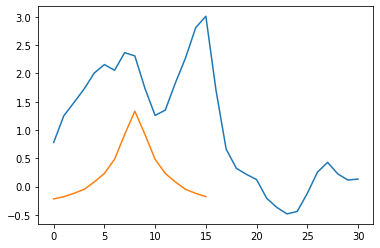

In [ ]:
corr_test = np.correlate(y_new[12:], pred_test[12:], mode='full')
auto_test = np.correlate(y_test[12:], y_test[12:], mode='same')
plt.plot(corr_test)
plt.plot(auto_test)


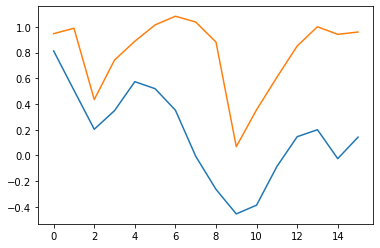

In [ ]:
y_new = y_test / scale
plt.figure(figsize=(30, 10))
plt.plot(y_new[12:])
plt.plot(pred_test[12:])
plt.legend(['Test Data', 'Predicted da'])

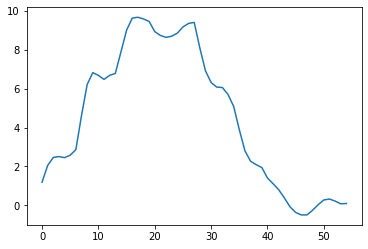

In [ ]:
corr_new = np.correlate(y_new, pred_test, mode='full')
plt.plot(corr_new)
# plt.plot(auto_corr)

In [ ]:
from sklearn.metrics import mean_absolute_error
import math
mae = mean_absolute_error(y_new.flatten().ravel(), y_preed.flatten().ravel())
print(mae)

NameError: ignored

In [ ]:
print(1 - (mae / np.mean(y_new.flatten().ravel())))

NameError: ignored

In [ ]:
train_corr = np.correlate(x_train_shaped.flatten().ravel(), )

TypeError: ignored